In [2]:
import pandas as pd
import numpy as np
import holoviews as hv
import hvplot.pandas
import matplotlib.pyplot as plt
import re

import maestro_file
from pathlib import Path

from bokeh.io import output_notebook
from bokeh.plotting import figure, show

output_notebook()
hv.extension('bokeh')


Loading BokehJS ...

In [3]:
data_dir = Path.cwd().parent / "data/fiona_sst/fi211109"
file_path = data_dir / "fi211109a.2040"
print(file_path)
with open(file_path, 'rb') as f:
        data_file = maestro_file.DataFile.load(f.read(), file_path.name)

print(data_file)

/home/barak/Projects/population_analysis/data/fiona_sst/fi211109/fi211109a.2040
DataFile(file_name='fi211109a.2040', header=DataFileHeader(trial_name='STOP_L_SSD4', num_ai_channels=7, channel_list=(0, 1, 2, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0), display_height_pix=768, display_width_pix=1024, display_distance_mm=610, display_width_mm=365, display_height_mm=285, display_framerate_hz=84.991662, pos_scale=1.0, pos_theta=0.0, vel_scale=1.0, vel_theta=0.0, reward_len1_ms=40, reward_len2_ms=1, date_recorded=datetime.date(2021, 11, 9), version=23, flags=9222, num_bytes_compressed=12113, num_scans_saved=1712, num_spike_bytes_compressed=42780, spike_sample_intv_us=40, xy_random_seed=0, rp_distro_start=0, rp_distro_dur=0, rp_distro_response=0, rp_distro_windows=(0, 0, 0, 0), rp_distro_response_type=0, horizontal_start_pos=0.0, vertical_start_pos=0.0, trial_flags=257, search_target_selected=-1, velocity_stab_window_len_ms=1, eyelink_info=(2, -990, -845, 1055, -845, 20, 648, 3, 1609), trial_set_n

In [4]:
""" Immutable representation of the parsed contents of a single Maestro data file. """
# file_name: str
""" The data file name ('basename.NNNN')."""
# header: DataFileHeader
""" The contents of the data file's header record. """
# ai_data: Dict[int, List[int]]
""" Decompressed analog data traces, keyed by AI channel index (1KHz sampling rate). """
# spike_wave: Optional[List[int]]
""" Decompressed high-resolution spike waveform. None if not found in file. """
# trial: Trial
""" Definition of Maestro trial as culled from the trial codes in the data file. """
# events: Optional[Dict[int, List[float]]]
""" List of recorded marker pulse event times, keyed by event channel index 0-15. Times in ms. """
# blinks: Optional[List[int]]
""" List of recorded EyeLink "blink epochs": Pairs of (start, end) times in chronological order in ms. """
# sorted_spikes: Optional[Dict[int, List[float]]]
""" List of spike occurrence times on sorted spike train channels, keyed by channel index. Times in ms. """

print(data_file.file_name)
print(data_file.header)
print(data_file.ai_data)
print((data_file.spike_wave))
print(data_file.trial)
print(data_file.events)
print(data_file.blinks)
print(data_file.sorted_spikes[26])


fi211109a.2040
DataFileHeader(trial_name='STOP_L_SSD4', num_ai_channels=7, channel_list=(0, 1, 2, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0), display_height_pix=768, display_width_pix=1024, display_distance_mm=610, display_width_mm=365, display_height_mm=285, display_framerate_hz=84.991662, pos_scale=1.0, pos_theta=0.0, vel_scale=1.0, vel_theta=0.0, reward_len1_ms=40, reward_len2_ms=1, date_recorded=datetime.date(2021, 11, 9), version=23, flags=9222, num_bytes_compressed=12113, num_scans_saved=1712, num_spike_bytes_compressed=42780, spike_sample_intv_us=40, xy_random_seed=0, rp_distro_start=0, rp_distro_dur=0, rp_distro_response=0, rp_distro_windows=(0, 0, 0, 0), rp_distro_response_type=0, horizontal_start_pos=0.0, vertical_start_pos=0.0, trial_flags=257, search_target_selected=-1, velocity_stab_window_len_ms=1, eyelink_info=(2, -990, -845, 1055, -845, 20, 648, 3, 1609), trial_set_name='CSST', trial_subset_name='', rmvideo_sync_size_mm=10, rmvideo_sync_dur_frames=1, timestamp_ms=94371199, 

In [63]:
"""
DataFileHeader(
    trial_name='STOP_L_SSD4', 
    num_ai_channels=7, 
    channel_list=(0, 1, 2, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0), 
    display_height_pix=768, display_width_pix=1024, 
    display_distance_mm=610, display_width_mm=365, 
    display_height_mm=285, 
    display_framerate_hz=84.991662, 
    pos_scale=1.0, pos_theta=0.0, 
    vel_scale=1.0, vel_theta=0.0, 
    reward_len1_ms=40, reward_len2_ms=1, 
    date_recorded=datetime.date(2021, 11, 9), 
    version=23, 
    flags=9222, 
    num_bytes_compressed=12113, 
    num_scans_saved=1712, 
    num_spike_bytes_compressed=42780, 
    spike_sample_intv_us=40, xy_random_seed=0, 
    rp_distro_start=0, rp_distro_dur=0, 
    rp_distro_response=0, rp_distro_windows=(0, 0, 0, 0), 
    rp_distro_response_type=0, 
    horizontal_start_pos=0.0, vertical_start_pos=0.0, 
    trial_flags=257, 
    search_target_selected=-1, 
    velocity_stab_window_len_ms=1, 
    eyelink_info=(2, -990, -845, 1055, -845, 20, 648, 3, 1609), 
    trial_set_name='CSST', 
    trial_subset_name='', 
    rmvideo_sync_size_mm=10, 
    rmvideo_sync_dur_frames=1, 
    timestamp_ms=94371199, 
    rmvideo_duplicate_events=(0, 0, 0, 0, 0, 0)
)
"""

data_dir = Path.cwd().parent / "data/fiona_sst/fi211109"
# file_path = data_dir / ("fi211109a." + "2034") # Successful STOP_L_SSD2
# file_path = data_dir / ("fi211109a." + "2037") # GO_L
# file_path = data_dir / ("fi211109a." + "2040") # Failed STOP_L 
# file_path = data_dir / ("fi211109a." + "2027") # Failed GO_L
# file_path = data_dir / ("fi211109a." + "0537") # Failed GO_L
# file_path = data_dir / ("fi211109a." + "2022") # Successful CONT_L_SSD1
file_path = data_dir / ("fi211109a." + "1018") # Failed CONT_L_SSD1

print(file_path)
with open(file_path, 'rb') as f:
        data_file = maestro_file.DataFile.load(f.read(), file_path.name)


print(data_file.header.trial_name, data_file.header.search_target_selected, (data_file.header.flags))
reward_earned = bool(data_file.header.flags & maestro_file.FLAG_REWARD_EARNED)
reward_given = bool(data_file.header.flags & maestro_file.FLAG_REWARD_GIVEN)

print(f"Reward earned: {reward_earned}")
print(f"Reward given: {reward_given}")

/home/barak/Projects/population_analysis/data/fiona_sst/fi211109/fi211109a.1018
CONT_L_SSD1 0 8194
Reward earned: False
Reward given: False


In [64]:
"""
    name: str
    set_name: Optional[str]     # trial set and subset names added to data file in V=21
    subset_name: Optional[str]
    segments: List[Trial.Segment]
    targets: List[Target]
    perts: List[Trial.Perturbation]
    sections: List[TaggedSection]
    record_seg: int
    skip_seg: int
    file_version: int
    xy_seed: int
    global_transform: TargetTransform
"""
print(data_file.trial.name)
print(data_file.trial.set_name)
print(data_file.trial.subset_name)
print(data_file.trial.segments)
print(data_file.trial.targets)
print(data_file.trial.perts)
print(data_file.trial.sections)
print(data_file.trial.record_seg)
print(data_file.trial.skip_seg)
print(data_file.trial.file_version)
print(data_file.trial.xy_seed)
print(data_file.trial.global_transform)

CONT_L_SSD1
CSST

[<maestro_file.Trial.Segment object at 0x7bbcad769250>, <maestro_file.Trial.Segment object at 0x7bbcad7685f0>, <maestro_file.Trial.Segment object at 0x7bbcad769f40>, <maestro_file.Trial.Segment object at 0x7bbcad768d70>, <maestro_file.Trial.Segment object at 0x7bbcad76a0c0>]
[Target(hardware_type=29, name='Fix_Spot', definition=RMVideoTarget(type=4, aperture=1, flags=0, rgb_mean=(16777215, 0), rgb_contrast=(0, 0), outer_w=1.0, outer_h=1.0, inner_w=0.009999999776482582, inner_h=0.009999999776482582, num_dots=32759, dot_size=1, seed=0, percent_coherent=1070850888, noise_update_intv=591, noise_limit=1, dot_life=0.0, spatial_frequency=(4.203895392974451e-45, 0.0), drift_axis=(1.401298464324817e-45, 0.0), spatial_phase=(0.0, 0.0), sigma=(0.0, 0.0), media_folder='', media_file='', flicker_on_dur=0, flicker_off_dur=0, flicker_delay=0)), Target(hardware_type=29, name='GO_Target', definition=RMVideoTarget(type=4, aperture=1, flags=0, rgb_mean=(16777215, 0), rgb_contrast=(0, 0)

In [65]:
print(len(data_file.trial.segments))
print(len(data_file.trial.targets))

5
4


In [66]:
from pprint import pprint

# data_file.trial.targets[0]
print(np.array([seg.dur for seg in data_file.trial.segments[:]]).sum())
pprint(data_file.trial.segments[2].summary())
# data_file.trial.segments[0].tgt_on
# print([seg.tgt_on for seg in data_file.trial.segments])
print([seg.tgt_on for seg in data_file.trial.segments])
print([[str(pos) for pos in seg.tgt_pos] for seg in data_file.trial.segments])



2205
{'dur': 48,
 'fix1': -1,
 'fix2': -1,
 'fixacc_h': 3.0,
 'fixacc_v': 3.0,
 'grace': 0,
 'marker': 4,
 'trajectories': [{'acc': '(0, 0)',
                   'on': False,
                   'patacc': '(0, 0)',
                   'patvel': '(0, 0)',
                   'pos': '(0, 0) abs',
                   'vel': '(0, 0)',
                   'vstab': 'OFF'},
                  {'acc': '(0, 0)',
                   'on': True,
                   'patacc': '(0, 0)',
                   'patvel': '(0, 0)',
                   'pos': '(-12, 0) abs',
                   'vel': '(0, 0)',
                   'vstab': 'OFF'},
                  {'acc': '(0, 0)',
                   'on': False,
                   'patacc': '(0, 0)',
                   'patvel': '(0, 0)',
                   'pos': '(0, 0) abs',
                   'vel': '(0, 0)',
                   'vstab': 'OFF'},
                  {'acc': '(0, 0)',
                   'on': False,
                   'patacc': '(0, 0)',
            

In [67]:
# plt.plot(np.array([data_file.ai_data[i] for i in [0,1,2,3,4,5,6]]).T / 40)
ai_data = pd.DataFrame(data_file.ai_data) 

print(ai_data.shape, 1875 - ai_data.shape[0])
# plt./legend(list(np.arange(7)))
seg_times = np.array([0] + [seg.dur for seg in data_file.trial.segments]).cumsum()
print(seg_times)
p = ai_data.hvplot.line(y=[f'{i}' for i in range(seg_times.size - 1)], legend='bottom', height=600, width=800)
# p = p * hv.VSpan(0, 0 + data_file.trial.segments[0].dur) *  hv.VSpan(data_file.trial.segments[0].dur, data_file.trial.segments[0].dur + data_file.trial.segments[1].dur)
for i in range(len(seg_times)-1):
    p = p * hv.VSpan(seg_times[i], seg_times[i+1])
p


(1507, 7) 368
[   0  500 1055 1103 1505 2205]


:Overlay
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [index]   (value)
   .VSpan.I     :VSpan   [x,y]
   .VSpan.II    :VSpan   [x,y]
   .VSpan.III   :VSpan   [x,y]
   .VSpan.IV    :VSpan   [x,y]
   .VSpan.V     :VSpan   [x,y]

In [68]:
base_path = data_dir.parents[0]
print(base_path)
dirs = [d for d in base_path.iterdir() if d.is_dir()]
print(dirs)

/home/barak/Projects/population_analysis/data/fiona_sst
[PosixPath('/home/barak/Projects/population_analysis/data/fiona_sst/fi210824'), PosixPath('/home/barak/Projects/population_analysis/data/fiona_sst/fi210908'), PosixPath('/home/barak/Projects/population_analysis/data/fiona_sst/fi210902'), PosixPath('/home/barak/Projects/population_analysis/data/fiona_sst/fi211003'), PosixPath('/home/barak/Projects/population_analysis/data/fiona_sst/fi210707'), PosixPath('/home/barak/Projects/population_analysis/data/fiona_sst/fi210629'), PosixPath('/home/barak/Projects/population_analysis/data/fiona_sst/fi210712'), PosixPath('/home/barak/Projects/population_analysis/data/fiona_sst/fi211012'), PosixPath('/home/barak/Projects/population_analysis/data/fiona_sst/fi210920'), PosixPath('/home/barak/Projects/population_analysis/data/fiona_sst/fi210916'), PosixPath('/home/barak/Projects/population_analysis/data/fiona_sst/fi210630'), PosixPath('/home/barak/Projects/population_analysis/data/fiona_sst/fi21081

In [69]:
files = []
for dir_path in dirs:
    files += list(f for f in dir_path.iterdir() if f.is_file())
len(files)

126297

In [70]:
print(file_path)
with open(file_path, 'rb') as f:
        data_file = maestro_file.DataFile.load(f.read(), file_path.name)

data_file.trial.name
# int(data_file.trial.name[1:])
data_file.trial

# """
# Trial(name='v20d0', set_name=None, subset_name=None, 
# segments=[
#         <maestro_file.Trial.Segment object at 0x7a3c762cb910>,
#         <maestro_file.Trial.Segment object at 0x7a3c76302350>,
#         <maestro_file.Trial.Segment object at 0x7a3c76302b10>, 
#         <maestro_file.Trial.Segment object at 0x7a3c76302750>,
#         <maestro_file.Trial.Segment object at 0x7a3c76302710>
# ], 
# targets=[Target(hardware_type=29, name='fix', 
# definition=RMVideoTarget(type=4, aperture=1, flags=-381712, rgb_mean=(16777215, 17805478), 
# rgb_contrast=(9272576, 18006180), outer_w=0.30000001192092896, 
# outer_h=0.30000001192092896, inner_w=0.009999999776482582, inner_h=0.009999999776482582, 
# num_dots=9272576, dot_size=1, seed=18006180, percent_coherent=1,
#  noise_update_intv=9113376, noise_limit=9409920, dot_life=0.0, 
#  spatial_frequency=(2.475533867076222e-39, 2.2982795605582292e-38), 
#  drift_axis=(2.695417774826672e-38, 0.0), spatial_phase=(9.528829557408756e-44, 1.2993668929910584e-38), 
#  sigma=(0.0, 0.0), media_folder='', media_file='', flicker_on_dur=0, 
#  flicker_off_dur=0, flicker_delay=0))], perts=[], sections=[], record_seg=0, 
#  skip_seg=-1, file_version=19, xy_seed=0, 
#  global_transform=TargetTransform(pos_offsetH_deg=0.0, pos_offsetV_deg=0.0, pos_scale=1.0, pos_rotate_deg=0.0, 
#  vel_scale=1.0, vel_rotate_deg=0.0))
# """

/home/barak/Projects/population_analysis/data/fiona_sst/fi211109/fi211109a.1018


Trial(name='CONT_L_SSD1', set_name='CSST', subset_name='', segments=[<maestro_file.Trial.Segment object at 0x7bbcaced4140>, <maestro_file.Trial.Segment object at 0x7bbcaab43aa0>, <maestro_file.Trial.Segment object at 0x7bbcaab403b0>, <maestro_file.Trial.Segment object at 0x7bbcad056270>, <maestro_file.Trial.Segment object at 0x7bbcaababa10>], targets=[Target(hardware_type=29, name='Fix_Spot', definition=RMVideoTarget(type=4, aperture=1, flags=0, rgb_mean=(16777215, 0), rgb_contrast=(0, 0), outer_w=1.0, outer_h=1.0, inner_w=0.009999999776482582, inner_h=0.009999999776482582, num_dots=32759, dot_size=1, seed=0, percent_coherent=1070850888, noise_update_intv=591, noise_limit=1, dot_life=0.0, spatial_frequency=(4.203895392974451e-45, 0.0), drift_axis=(1.401298464324817e-45, 0.0), spatial_phase=(0.0, 0.0), sigma=(0.0, 0.0), media_folder='', media_file='', flicker_on_dur=0, flicker_off_dur=0, flicker_delay=0)), Target(hardware_type=29, name='GO_Target', definition=RMVideoTarget(type=4, apert

In [71]:
"""
Trial(
    name='d90', 
    set_name='8dir_saccade', 
    subset_name='', 
    segments=[<maestro_file.Trial.Segment object at 0x10dad2a80>, <maestro_file.Trial.Segment object at 0x10dbce570>, <maestro_file.Trial.Segment object at 0x10dbcfe00>, <maestro_file.Trial.Segment object at 0x10dbcf830>, <maestro_file.Trial.Segment object at 0x10dbcdeb0>],
    targets=[
        Target(hardware_type=29, name='spot-0.5deg', definition=RMVideoTarget(type=4, aperture=1, flags=0, rgb_mean=(16776960, 0), rgb_contrast=(0, 0), outer_w=1.0, outer_h=1.0, inner_w=0.009999999776482582, inner_h=0.009999999776482582, num_dots=32759, dot_size=1, seed=0, percent_coherent=1070871240, noise_update_intv=591, noise_limit=1, dot_life=0.0, spatial_frequency=(4.203895392974451e-45, 0.0), drift_axis=(1.401298464324817e-45, 0.0), spatial_phase=(0.0, 0.0), sigma=(0.0, 0.0), media_folder='', media_file='', flicker_on_dur=0, flicker_off_dur=0, flicker_delay=0)), Target(hardware_type=29, name='spot-0.5deg1', definition=RMVideoTarget(type=4, aperture=1, flags=0, rgb_mean=(16776960, 0), rgb_contrast=(0, 0), outer_w=1.0, outer_h=1.0, inner_w=0.009999999776482582, inner_h=0.009999999776482582, num_dots=32759, dot_size=1, seed=0, percent_coherent=1070871432, noise_update_intv=591, noise_limit=1, dot_life=0.0, spatial_frequency=(2.802596928649634e-45, 0.0), drift_axis=(1.401298464324817e-45, 0.0), spatial_phase=(0.0, 0.0), sigma=(0.0, 0.0), media_folder='', media_file='', flicker_on_dur=0, flicker_off_dur=0, flicker_delay=0))], perts=[], sections=[], record_seg=0, skip_seg=-1, file_version=23, xy_seed=0, global_transform=TargetTransform(pos_offsetH_deg=0.0, pos_offsetV_deg=0.0, pos_scale=1.0, pos_rotate_deg=0.0, vel_scale=1.0, vel_rotate_deg=0.0))


"""

"\nTrial(\n    name='d90', \n    set_name='8dir_saccade', \n    subset_name='', \n    segments=[<maestro_file.Trial.Segment object at 0x10dad2a80>, <maestro_file.Trial.Segment object at 0x10dbce570>, <maestro_file.Trial.Segment object at 0x10dbcfe00>, <maestro_file.Trial.Segment object at 0x10dbcf830>, <maestro_file.Trial.Segment object at 0x10dbcdeb0>],\n    targets=[\n        Target(hardware_type=29, name='spot-0.5deg', definition=RMVideoTarget(type=4, aperture=1, flags=0, rgb_mean=(16776960, 0), rgb_contrast=(0, 0), outer_w=1.0, outer_h=1.0, inner_w=0.009999999776482582, inner_h=0.009999999776482582, num_dots=32759, dot_size=1, seed=0, percent_coherent=1070871240, noise_update_intv=591, noise_limit=1, dot_life=0.0, spatial_frequency=(4.203895392974451e-45, 0.0), drift_axis=(1.401298464324817e-45, 0.0), spatial_phase=(0.0, 0.0), sigma=(0.0, 0.0), media_folder='', media_file='', flicker_on_dur=0, flicker_off_dur=0, flicker_delay=0)), Target(hardware_type=29, name='spot-0.5deg1', defin

In [72]:
data_file.trial.targets[0].definition
# """
# Target(hardware_type=29, name='fix', 
# definition=RMVideoTarget(type=4, aperture=1, flags=-381712, rgb_mean=(16777215, 18198694), rgb_contrast=(12811536, 18399396), outer_w=0.30000001192092896, outer_h=0.30000001192092896, inner_w=0.009999999776482582, inner_h=0.009999999776482582, num_dots=12811536, dot_size=1, seed=18399396, percent_coherent=1, noise_update_intv=12652320, noise_limit=12569160, dot_life=0.0, spatial_frequency=(4.311100330689157e-39, 2.355773014861473e-38), drift_axis=(2.8056203702162614e-38, 0.0), spatial_phase=(9.528829557408756e-44, 1.795280814321754e-38), sigma=(0.0, 0.0), media_folder='', media_file='', flicker_on_dur=0, flicker_off_dur=0, flicker_delay=0))
# """

RMVideoTarget(type=4, aperture=1, flags=0, rgb_mean=(16777215, 0), rgb_contrast=(0, 0), outer_w=1.0, outer_h=1.0, inner_w=0.009999999776482582, inner_h=0.009999999776482582, num_dots=32759, dot_size=1, seed=0, percent_coherent=1070850888, noise_update_intv=591, noise_limit=1, dot_life=0.0, spatial_frequency=(4.203895392974451e-45, 0.0), drift_axis=(1.401298464324817e-45, 0.0), spatial_phase=(0.0, 0.0), sigma=(0.0, 0.0), media_folder='', media_file='', flicker_on_dur=0, flicker_off_dur=0, flicker_delay=0)

In [73]:
[len(data_file.ai_data[key]) for key in data_file.ai_data.keys()]
# data_file.ai_data[2]

[1507, 1507, 1507, 1507, 1507, 1507, 1507]

In [74]:
def extract_trail_info_from_trial_name(text):
    """
    Extract information from three types of strings:
    1. GO_{R/L} -> returns direction
    2. STOP_{R/L}_SSD{1/2/3/4} -> returns direction and number
    3. CONT_{R/L}_SSD{1/2/3/4} -> returns direction and number
    """
    
    # Method 1: Single comprehensive regex pattern
    pattern = r'^(GO|STOP|CONT)_([RL])(?:_SSD([1-4]))?$'
    match = re.match(pattern, text)
    
    if match:
        prefix = match.group(1)
        direction = match.group(2)
        ssd_number = match.group(3)  # Will be None for GO type
        
        if prefix == "GO":
            return {"type": "GO", "direction": direction}
        else:
            return {"type": prefix, "direction": direction, "ssd_number": int(ssd_number)}
    
    return None

def get_file_data(file_path: Path) -> dict:
    posNormalizer = 40
    velNormalizer = 10.8826
    
    with open(file_path, 'rb') as f:
        data_file = maestro_file.DataFile.load(f.read(), file_path.name)
    
    # Extract trial information using regex
    trial_info = extract_trail_info_from_trial_name(data_file.trial.name)
    
    # Handle case where trial name doesn't match expected patterns
    if trial_info is None:
        Warning(f"Trial name '{data_file.trial.name}' doesn't match expected patterns")
        trial_type = None
        direction = None
        ssd_number = None
        dir_value = None
    else:
        trial_type = trial_info.get("type")
        direction = trial_info.get("direction")
        ssd_number = trial_info.get("ssd_number")  # Will be None for GO trials
        
        # Convert direction to dir value: R=0, L=180
        dir_value = 0 if direction == "R" else 180 if direction == "L" else None
    
    trail_row = {
        'filename_name': data_file.file_name,
        'trail_session': data_file.file_name.split('.')[0],
        'trail_number': data_file.file_name.split('.')[1],
        'trial_name': data_file.trial.name,
        'type': trial_type,                    # GO, STOP, or CONT
        'direction': direction,                # R or L
        'ssd_number': ssd_number,             # 1-4 for STOP/CONT, None for GO
        'dir': dir_value,                     # 0 for R, 180 for L
        'hPos': np.array(data_file.ai_data[0]) / posNormalizer,
        'vPos': np.array(data_file.ai_data[1]) / posNormalizer,
        'hVel': np.array(data_file.ai_data[2]) / velNormalizer,
        'vVel': np.array(data_file.ai_data[3]) / velNormalizer,
        'trial_length': len(data_file.ai_data[0]),
        'blinks': data_file.blinks,
        'trial_failed': not bool(data_file.header.flags & maestro_file.FLAG_REWARD_GIVEN),
    }    
    return trail_row


# 'spike_times','saccades', 'fail', 'idx', 'cell_id',
# 'motion_onset', 'cue_onset',
# 'dir_change', 'screen_rotation', 'task',
# 'first_relevant_saccade', 'max_relevant_interval'
# 'speed', 'posProjection', 'velProjection'

print(file_path)    
test_data = get_file_data(file_path)
test_data

/home/barak/Projects/population_analysis/data/fiona_sst/fi211109/fi211109a.1018


{'filename_name': 'fi211109a.1018',
 'trail_session': 'fi211109a',
 'trail_number': '1018',
 'trial_name': 'CONT_L_SSD1',
 'type': 'CONT',
 'direction': 'L',
 'ssd_number': 1,
 'dir': 180,
 'hPos': array([11.1  , 11.1  , 11.1  , ..., -0.225, -0.2  , -0.2  ], shape=(1507,)),
 'vPos': array([0.25 , 0.25 , 0.25 , ..., 0.425, 0.425, 0.425], shape=(1507,)),
 'hVel': array([-1.10267767, -1.10267767, -1.10267767, ..., -1.01078786,
         0.18377961,  0.36755922], shape=(1507,)),
 'vVel': array([-0.27566942, -0.27566942, -0.27566942, ...,  2.29724514,
         5.32960873,  5.42149854], shape=(1507,)),
 'trial_length': 1507,
 'blinks': [34, 145],
 'trial_failed': True}

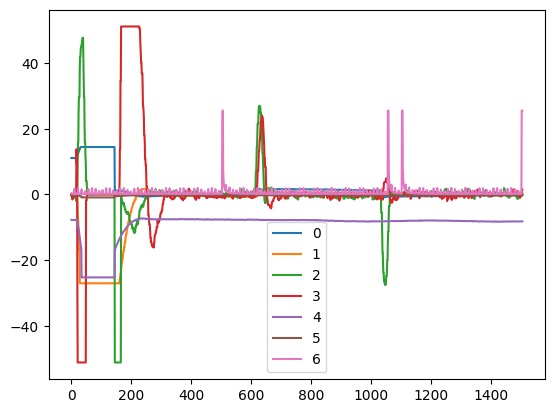

In [75]:
import matplotlib.pyplot as plt
plt.plot(np.array([data_file.ai_data[i] for i in [0,1,2,3,4,5,6]]).T / 40)
plt.legend(list(np.arange(7)))
# 0 & 1 are the hor and ver eye data, 2 and 3 are the hor and ver eye velocity. pos normalizer - 40, vel normalizer - 10.8826


In [76]:
(data_file.trial)

Trial(name='CONT_L_SSD1', set_name='CSST', subset_name='', segments=[<maestro_file.Trial.Segment object at 0x7bbcaced4140>, <maestro_file.Trial.Segment object at 0x7bbcaab43aa0>, <maestro_file.Trial.Segment object at 0x7bbcaab403b0>, <maestro_file.Trial.Segment object at 0x7bbcad056270>, <maestro_file.Trial.Segment object at 0x7bbcaababa10>], targets=[Target(hardware_type=29, name='Fix_Spot', definition=RMVideoTarget(type=4, aperture=1, flags=0, rgb_mean=(16777215, 0), rgb_contrast=(0, 0), outer_w=1.0, outer_h=1.0, inner_w=0.009999999776482582, inner_h=0.009999999776482582, num_dots=32759, dot_size=1, seed=0, percent_coherent=1070850888, noise_update_intv=591, noise_limit=1, dot_life=0.0, spatial_frequency=(4.203895392974451e-45, 0.0), drift_axis=(1.401298464324817e-45, 0.0), spatial_phase=(0.0, 0.0), sigma=(0.0, 0.0), media_folder='', media_file='', flicker_on_dur=0, flicker_off_dur=0, flicker_delay=0)), Target(hardware_type=29, name='GO_Target', definition=RMVideoTarget(type=4, apert

In [77]:
print([str(p) for p in data_file.trial.segments[2].tgt_pos])

['(0, 0)', '(-12, 0)', '(0, 0)', '(0, 0)']


In [78]:
data_file.trial.segments[2].tgt_on

[False, True, False, False]

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
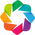

[array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]], shape=(2205, 2)), array([[  0.,   0.],
       [  0.,   0.],
       [  0.,   0.],
       ...,
       [-12.,   0.],
       [-12.,   0.],
       [-12.,   0.]], shape=(2205, 2)), array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]], shape=(2205, 2)), array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]], shape=(2205, 2))]


:Overlay
   .Curve.I  :Curve   [x]   (y)
   .Curve.II :Curve   [x]   (y)

In [79]:
hv.extension('bokeh')
tgt_trjs = data_file.trial.target_trajectories()
print((tgt_trjs))
p = hv.Curve(tgt_trjs[0][:, 0]) * hv.Curve(tgt_trjs[0][:, 1]).opts(width=800, height=400, tools=['hover'])
# p = hv.Path([tgt_trjs[0]]).opts(width=800, height=400, tools=['hover'], color='red', line_dash='dotted')
p